<a href="https://colab.research.google.com/github/TranPhu1999/HCMUS-NLPS-AIChallenge/blob/Phu/HCMUS_NLPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tham khảo
- Paper: https://paperswithcode.com/paper/frozen-in-time-a-joint-video-and-image
- Towee repo: https://github.com/towhee-io/towhee
- Video-text retrival: https://codelabs.towhee.io/how-to-build-a-text-video-retrieval-engine/index#1
- Similar video: https://codelabs.towhee.io/build-a-reverse-video-search-engine-in-minutes/index#0

In [1]:
# !pip install -r requirements.txt

In [39]:
import towhee
import os
import glob
from PIL import Image
import pandas as pd
import numpy as np

# Towhee text-video inference

In [3]:
# !curl -L https://github.com/towhee-io/examples/releases/download/data/text_video_search.zip -O

In [4]:
# Nếu chạy không được lệnh này thì ra ngoài folder rồi tự unzip
# !unzip -q -o text_video_search.zip

In [5]:
# ls

In [6]:
# import pandas as pd
# import os

# raw_video_path = './test_1k_compress' # 1k test video path.
# test_csv_path = './MSRVTT_JSFUSION_test.csv' # 1k video caption csv.

# test_sample_csv_path = './MSRVTT_JSFUSION_test_sample.csv'

# sample_num = 1000 # you can change this sample_num to be smaller, so that this notebook will be faster.
# test_df = pd.read_csv(test_csv_path)
# print('length of all test set is {}'.format(len(test_df)))
# sample_df = test_df.sample(sample_num, random_state=42)

# sample_df['video_path'] = sample_df.apply(lambda x:os.path.join(raw_video_path, x['video_id']) + '.mp4', axis=1)

# sample_df.to_csv(test_sample_csv_path)
# print('random sample {} examples'.format(sample_num))

# df = pd.read_csv(test_sample_csv_path)

# df[['video_id', 'video_path', 'sentence']].head()

In [7]:
# from IPython import display
# from pathlib import Path
# import towhee
# from PIL import Image

# def display_gif(video_path_list, text_list):
#     html = ''
#     for video_path, text in zip(video_path_list, text_list):
#         html_line = '<img src="{}"> {} <br/>'.format(video_path, text)
#         html += html_line
#     return display.HTML(html)

    
# def convert_video2gif(video_path, output_gif_path, num_samples=16):
#     frames = (
#         towhee.glob(video_path)
#               .video_decode.ffmpeg(sample_type='uniform_temporal_subsample', args={'num_samples': num_samples})
#               .to_list()[0]
#     )
#     imgs = [Image.fromarray(frame) for frame in frames]
#     imgs[0].save(fp=output_gif_path, format='GIF', append_images=imgs[1:], save_all=True, loop=0)


# def display_gifs_from_video(video_path_list, text_list, tmpdirname = './tmp_gifs'):
#     Path(tmpdirname).mkdir(exist_ok=True)
#     gif_path_list = []
#     for video_path in video_path_list:
#         video_name = str(Path(video_path).name).split('.')[0]
#         gif_path = Path(tmpdirname) / (video_name + '.gif')
#         convert_video2gif(video_path, gif_path)
#         gif_path_list.append(gif_path)
#     return display_gif(gif_path_list, text_list)

In [8]:
# sample_show_df = sample_df[:3]
# video_path_list = sample_show_df['video_path'].to_list()
# text_list = sample_show_df['sentence'].to_list()
# tmpdirname = './tmp_gifs'
# display_gifs_from_video(video_path_list, text_list, tmpdirname=tmpdirname)

In [9]:
# from pymilvus import connections, FieldSchema, CollectionSchema, DataType, Collection, utility

# connections.connect(host='127.0.0.1', port='19530')

# # def create_milvus_collection(collection_name, dim):
# #     if utility.has_collection(collection_name):
# #         utility.drop_collection(collection_name)
    
# #     fields = [
# #     FieldSchema(name='id', dtype=DataType.INT64, descrition='ids', is_primary=True, auto_id=False),
# #     FieldSchema(name='embedding', dtype=DataType.FLOAT_VECTOR, descrition='embedding vectors', dim=dim)
# #     ]
# #     schema = CollectionSchema(fields=fields, description='video retrieval')
# #     collection = Collection(name=collection_name, schema=schema)

# #     # create IVF_FLAT index for collection.
# #     index_params = {
# #         'metric_type':'L2', #IP
# #         'index_type':"IVF_FLAT",
# #         'params':{"nlist":2048}
# #     }
# #     collection.create_index(field_name="embedding", index_params=index_params)
# #     return collection

# # collection = create_milvus_collection('text_video_retrieval', 512)

In [10]:
# import os
# import towhee

# # # device = 'cuda:0'
# # # device = 'cpu'
# # # For the first time you run this line, 
# # # it will take some time 
# # # because towhee will download operator with weights on backend.
# # dc = (
# #     towhee.read_csv(test_sample_csv_path)
# #       .runas_op['video_id', 'id'](func=lambda x: int(x[-4:]))
# #       .video_decode.ffmpeg['video_path', 'frames'](sample_type='uniform_temporal_subsample', args={'num_samples': 12})
# #       .runas_op['frames', 'frames'](func=lambda x: [y for y in x])
# #       .video_text_embedding.clip4clip['frames', 'vec'](model_name='clip_vit_b32', modality='video')
# #       .to_milvus['id', 'vec'](collection=collection, batch=30)
# # )
# # print('Total number of inserted data is {}.'.format(collection.num_entities))

In [11]:
# # device = 'cuda:0'
# dc = (
#     towhee.read_csv(test_sample_csv_path).unstream()
#       .video_text_embedding.clip4clip['sentence','text_vec'](model_name='clip_vit_b32', modality='text')
#       .milvus_search['text_vec', 'top10_raw_res'](collection='text_video_retrieval', limit=10)
#       .runas_op['video_id', 'ground_truth'](func=lambda x : [int(x[-4:])])
#       .runas_op['top10_raw_res', 'top1'](func=lambda res: [x.id for i, x in enumerate(res) if i < 1])
#       .runas_op['top10_raw_res', 'top5'](func=lambda res: [x.id for i, x in enumerate(res) if i < 5])
#       .runas_op['top10_raw_res', 'top10'](func=lambda res: [x.id for i, x in enumerate(res) if i < 10])
# )

# dc.select['video_id', 'sentence', 'ground_truth', 'top10_raw_res', 'top1', 'top5', 'top10']().show()

In [12]:
# benchmark = (
#     dc.with_metrics(['mean_hit_ratio',])
#         .evaluate['ground_truth', 'top1'](name='recall_at_1')
#         .evaluate['ground_truth', 'top5'](name='recall_at_5')
#         .evaluate['ground_truth', 'top10'](name='recall_at_10')
#         .report()
# )

In [13]:
# import gradio
# import towhee.models.clip4clip

# device = 'cuda:0'
# collection='text_video_retrieval'
# show_num = 3
# with towhee.api() as api:
#     milvus_search_function = (
#          api.clip4clip(model_name='clip_vit_b32', modality='text', device=device)
#             .milvus_search(collection=collection, limit=show_num)
#             .runas_op(func=lambda res: [os.path.join(raw_video_path, 'video' + str(x.id) + '.mp4') for x in res])
#             .as_function()
#     )

# interface = gradio.Interface(milvus_search_function, 
#                              inputs=[gradio.Textbox()],
#                              outputs=[gradio.Video(format='mp4') for _ in range(show_num)]
#                             )

# interface.launch(inline=True, share=True)

# Towhee text-image inference

In [14]:
# !curl -L https://github.com/towhee-io/examples/releases/download/data/reverse_image_search.zip -O

In [28]:
img_path = glob.glob("../AIChallenge_data/KeyFrames*/*/*jpg")
img_path_df = pd.DataFrame(data={"id":np.arange(len(img_path)),"path":img_path})

In [14]:
import pandas as pd

# df = pd.read_csv('reverse_image_search/reverse_image_search.csv')
# df.head()

id                                     path        label
0   0  ./train/brain_coral/n01917289_1783.JPEG  brain_coral
1   1  ./train/brain_coral/n01917289_4317.JPEG  brain_coral
2   2   ./train/brain_coral/n01917289_765.JPEG  brain_coral
3   3  ./train/brain_coral/n01917289_1079.JPEG  brain_coral
4   4  ./train/brain_coral/n01917289_2484.JPEG  brain_coral

In [36]:
a = "./train/brain_coral/n01917289_1783.JPEG"
a.encode("utf-8")

b'./train/brain_coral/n01917289_1783.JPEG'

In [15]:
import cv2
from towhee._types.image import Image

id_img = df.set_index('id')['path'].to_dict()
def read_images(results):
    imgs = []
    for re in results:
        path = id_img[re.id]
        imgs.append(Image(cv2.imread(path), 'BGR'))
    return imgs

c:\Users\Admin\anaconda3\envs\env4ml\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [37]:
from pymilvus import connections, FieldSchema, CollectionSchema, DataType, Collection, utility

connections.connect(host='127.0.0.1', port='19530')

def create_milvus_collection(collection_name, dim):
    if utility.has_collection(collection_name):
        utility.drop_collection(collection_name)
    
    fields = [
    FieldSchema(name='id', dtype=DataType.INT64, descrition='ids', is_primary=True, auto_id=False),
    FieldSchema(name='frame_path',dtype=DataType.VARCHAR, description='path to frame image'),
    FieldSchema(name='embedding', dtype=DataType.FLOAT_VECTOR, descrition='embedding vectors', dim=dim)
    ]
    schema = CollectionSchema(fields=fields, description='text image search')
    collection = Collection(name=collection_name, schema=schema)

    # create IVF_FLAT index for collection.
    index_params = {
        'metric_type':'L2',
        'index_type':"IVF_FLAT",
        'params':{"nlist":512}
    }
    collection.create_index(field_name="embedding", index_params=index_params)
    return collection

collection = create_milvus_collection('text_image_challenge_search', 512)

PrimaryKeyException: <PrimaryKeyException: (code=0, message=Primary key type must be DataType.INT64.)>

In [35]:
import towhee

towhee.glob['path'](img_path[101:102]) \
      .image_decode['path', 'img']() \
      .image_text_embedding.clip['img', 'vec'](model_name='clip_vit_b32', modality='image') \
      .tensor_normalize['vec','vec']() \
      .select['img', 'vec']() \
      .show()

AttributeError: 'str' object has no attribute 'image_decode'

In [ ]:
# towhee.dc['text'](["A cat watching a computer screen while siting on a bench"]) \
#       .image_text_embedding.clip['text','vec'](model_name='clip_vit_b32', modality='text') \
#       .tensor_normalize['vec','vec']() \
#       .select['text', 'vec']() \
#       .show()

In [18]:
cd reverse_image_search

d:\GitHub\HCMUS-NLPS-AIChallenge\reverse_image_search


In [ ]:
collection = create_milvus_collection('text_image_search', 512)

dc = (
    towhee.read_csv('reverse_image_search.csv')
      .runas_op['id', 'id'](func=lambda x: int(x))
      .set_parallel(4)
      .image_decode['path', 'img']()
      .image_text_embedding.clip['img', 'vec'](model_name='clip_vit_b32', modality='image')
      .tensor_normalize['vec','vec']()
      .to_milvus['id', 'vec'](collection='text_image_search', batch=100)
)
print('Total number of inserted data is {}.'.format(collection.num_entities))

Total number of inserted data is 1000.



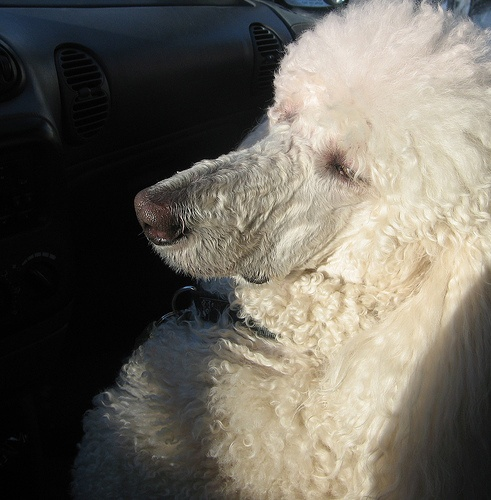
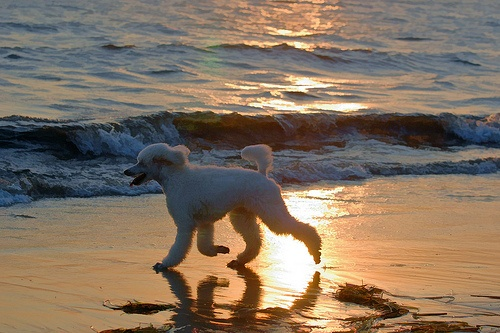
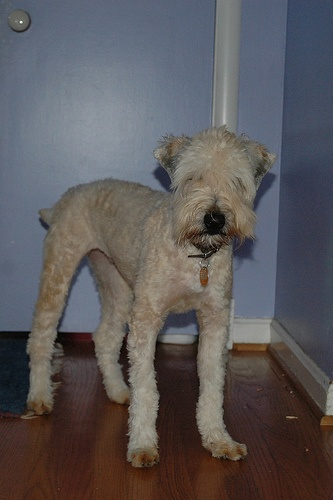
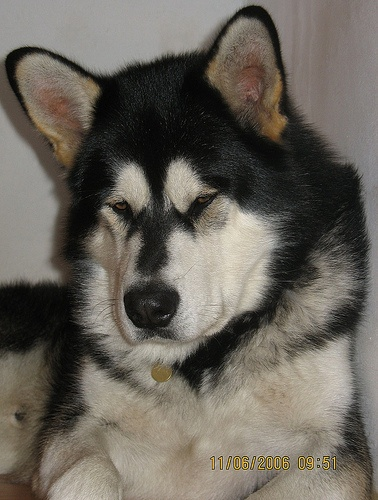
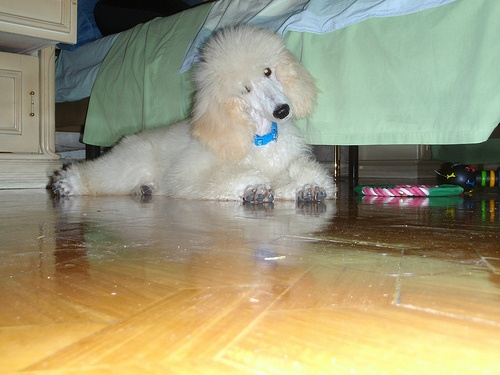
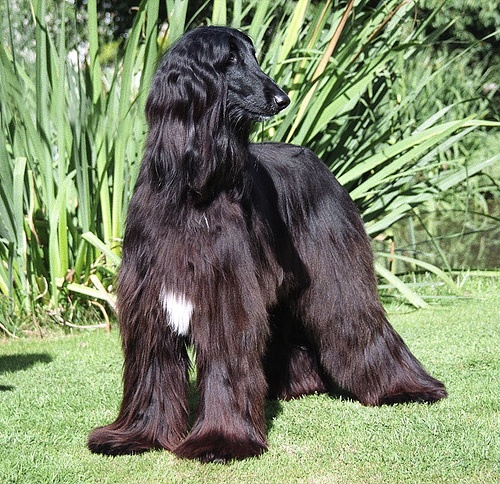
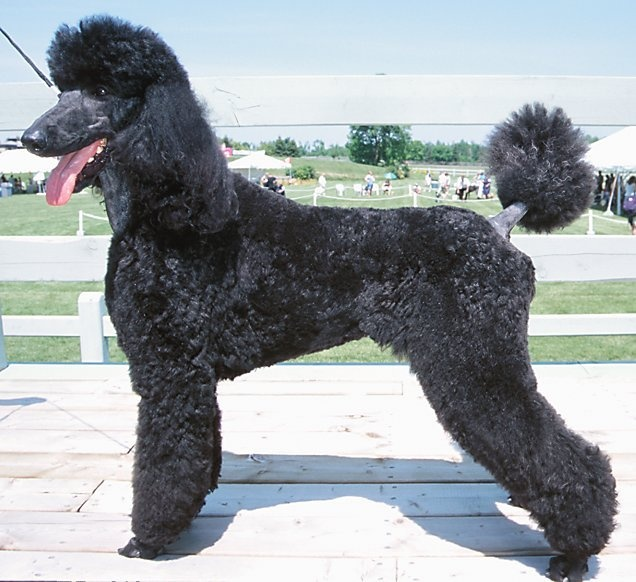
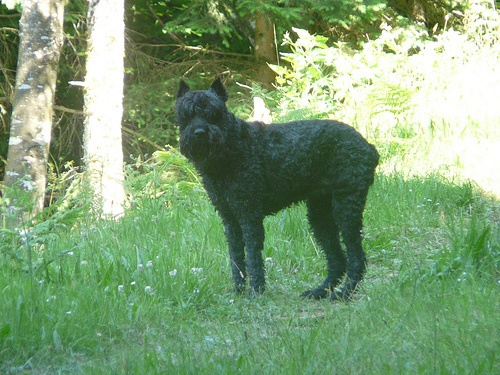
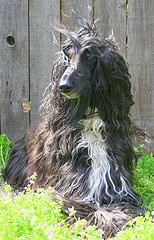
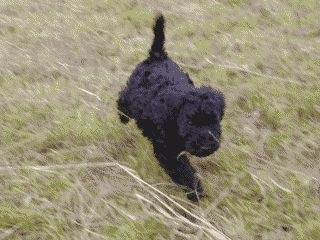

In [ ]:
# (
#     towhee.dc['text'](["A white dog","A black dog"])
#       .image_text_embedding.clip['text', 'vec'](model_name='clip_vit_b32', modality='text')
#       .tensor_normalize['vec','vec']()
#       .milvus_search['vec', 'result'](collection=collection, limit=5)
#       .runas_op['result', 'result_img'](func=read_images)
#       .select['text', 'result_img']()
#       .show()
# )

In [21]:
with towhee.api() as api:
    milvus_search_function = (
        api.image_text_embedding.clip(model_name='clip_vit_b32',modality='text')
            .tensor_normalize()
            .milvus_search(collection='text_image_search', limit=5)
            .runas_op(func=lambda res: [id_img[x.id] for x in res])
            .as_function()
    )

import gradio

interface = gradio.Interface(milvus_search_function, 
                             gradio.inputs.Textbox(lines=1),
                             [gradio.outputs.Image(type="file", label=None) for _ in range(5)]
                            )

interface.launch(inline=True, share=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://f65eb94977c7964a.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x1c816bdc8c8>,
 'http://127.0.0.1:7860/',
 'https://f65eb94977c7964a.gradio.app')